<a href="https://colab.research.google.com/github/KentFre/CDS_CardioVision/blob/datascience%2Fmachine_learning/Updated_SHAP_04_heart_disease_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predictive Analytics***

In [1]:
# Access to os
import os

# Libaries for data manipulation and visualization
import pandas as pd
import numpy as np

# Stratified train-test partitioning
from sklearn.model_selection import train_test_split

# Models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Libarie to automate model selection / fine-tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#  Neural Network Libaries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from scikeras.wrappers import KerasClassifier

# Metrics
import time
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Save models
import pickle

## 1. Loading dataset

In [2]:
# Load the complete_case dataset that was already prepared for machine learning (Standardization, One-Hot-Encoding)
df = pd.read_csv('02_processed_data/complete_case_machine_learning_data.csv')

In [3]:
# Display the first few rows
df.head()

,age,serum_cholesterol,max_heart_rate,st_depression,has_hypertension,cigarettes_per_day,years_smoking,resting_heart_rate,high_fasting_blood_sugar,exercise_induced_angina,...,gender_F,gender_M,cp_Asymptomatic,cp_Atypical_Angina,cp_Non_Anginal_Pain,cp_Typical_Angina,ecg_LVH,ecg_Normal,ecg_ST_Abnormality,Has_heart_disease
0,0.793589,0.056995,0.347747,1.073908,0.801969,1.718215,0.136405,-0.997063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,False
1,1.240459,0.708878,-1.260182,0.365719,0.801969,1.177475,1.382461,-0.692052,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True
2,1.240459,0.007796,-0.456218,1.339479,0.801969,0.095995,1.070947,0.375487,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True
3,-2.111065,0.266089,1.764255,2.136192,-1.246932,-0.985485,-1.109650,0.833004,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
4,-1.664195,-0.299696,1.189995,0.277195,0.801969,-0.985485,-1.109650,-0.158282,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False


In [4]:
# Change "Has_heart disease" to 0/1 instead of True/False, as it was excluded during clustering
df['Has_heart_disease'] = df['Has_heart_disease'].astype(int)

df.head()

,age,serum_cholesterol,max_heart_rate,st_depression,has_hypertension,cigarettes_per_day,years_smoking,resting_heart_rate,high_fasting_blood_sugar,exercise_induced_angina,...,gender_F,gender_M,cp_Asymptomatic,cp_Atypical_Angina,cp_Non_Anginal_Pain,cp_Typical_Angina,ecg_LVH,ecg_Normal,ecg_ST_Abnormality,Has_heart_disease
0,0.793589,0.056995,0.347747,1.073908,0.801969,1.718215,0.136405,-0.997063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1.240459,0.708878,-1.260182,0.365719,0.801969,1.177475,1.382461,-0.692052,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
2,1.240459,0.007796,-0.456218,1.339479,0.801969,0.095995,1.070947,0.375487,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
3,-2.111065,0.266089,1.764255,2.136192,-1.246932,-0.985485,-1.109650,0.833004,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,-1.664195,-0.299696,1.189995,0.277195,0.801969,-0.985485,-1.109650,-0.158282,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0




## 2. Data preparation for ML prediction


In [5]:
# Checking for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                         0
serum_cholesterol           0
max_heart_rate              0
st_depression               0
has_hypertension            0
cigarettes_per_day          0
years_smoking               0
resting_heart_rate          0
high_fasting_blood_sugar    0
exercise_induced_angina     0
family_history_cad          0
gender_F                    0
gender_M                    0
cp_Asymptomatic             0
cp_Atypical_Angina          0
cp_Non_Anginal_Pain         0
cp_Typical_Angina           0
ecg_LVH                     0
ecg_Normal                  0
ecg_ST_Abnormality          0
Has_heart_disease           0
dtype: int64


As expected, there are no missing values in the dataset. This has been handled before.

Now, the df should be converted into a numpy array to be ready for the machine learning models.

In [6]:
# Convert to numpy array
data = df.copy()
data_numpy = data.to_numpy()

data_numpy

array([[ 0.79358897,  0.05699475,  0.34774655, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24045884,  0.70887802, -1.26018245, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.24045884,  0.00779601, -0.45621795, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.21186822,  1.28696319,  0.50088265, ...,  0.        ,
         1.        ,  1.        ],
       [-0.10015076, -0.06600209, -1.56645464, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6818715 ,  0.31528812, -1.83444281, ...,  1.        ,
         0.        ,  1.        ]])

### Split the data into Input Features and Target Value


In [7]:
# Data separation
data_X= data.drop(["Has_heart_disease"], axis = 1).values
data_y = data["Has_heart_disease"].values

print("Input features (X):")
print(data_X.shape)
print(data_X)

print("\nTarget class (y):")
print(data_y.shape)
print(data_y)

Input features (X):
(396, 20)
[[ 0.79358897  0.05699475  0.34774655 ...  1.          0.
   1.        ]
 [ 1.24045884  0.70887802 -1.26018245 ...  0.          1.
   1.        ]
 [ 1.24045884  0.00779601 -0.45621795 ...  0.          1.
   1.        ]
 ...
 [-0.21186822  1.28696319  0.50088265 ...  1.          0.
   1.        ]
 [-0.10015076 -0.06600209 -1.56645464 ...  1.          0.
   0.        ]
 [ 0.6818715   0.31528812 -1.83444281 ...  0.          1.
   0.        ]]

Target class (y):
(396,)
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0

### Stratified Train-Test Partitioning

To ensure the correct distribution of patients with and without heart disease in both the training and test datasets, a stratified partitioning approach is applied. This method maintains the proportion of the target class (`Has_Heart_disease`) in each dataset.

The data is split with an 70/30 distribution, where 70% is used for training and 30% for testing. This split is chosen due to the relatively low number of available observations, maximizing the training data while retaining enough data for model evaluation.


In [8]:
# Adding Random Seeds to numpy and tensorflow
RANDOM_SEED = 12
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [9]:


X_train, X_test, y_train, y_test = train_test_split(data_X,
                                                    data_y,
                                                    test_size=0.3,
                                                    stratify = data_y,
                                                    random_state=RANDOM_SEED)

# Print the shape of the data
print("=== TRAIN ===")
print(X_train.shape)
print(y_train.shape)
print("=== TEST ===")
print(X_test.shape)
print(y_test.shape)


=== TRAIN ===
(277, 20)
(277,)
=== TEST ===
(119, 20)
(119,)




##3. ML Models Evaluation

The `10 models` that will be looked into are:



*   Logistic Regression
*   Random Forest
*   XGBoost
*   K-Nearest Neighbours
*   Support Vector Machine (SVM)
*   Decision Trees
*   Naive Bayes
*   Gradient Boosting Classifier
*   AdaBoost
*   Extra Trees


For each model, hyperparameter tuning will be performed using `GridSearchCV`. If a model does not have hyperparameters to tune (e.g., Naive Bayes), the default parameters are used. The best estimator and its performance for each model are then displayed.



The `performance metrics` used to evaluate the models are:


*   Precision
*   Recall
*   F1-score
*   Accuracy
*   AUC_ROC score








In [10]:
def create_nn_model(input_dim):
    model = Sequential()
    
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])
    
    return model

models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=RANDOM_SEED),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', random_state=RANDOM_SEED),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_SEED),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # GaussianNB doesn't have hyperparameters to tune
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_SEED),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=RANDOM_SEED, algorithm='SAMME'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(random_state=RANDOM_SEED),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'Neural Network': {
        # Wrap the model creation function using KerasClassifier from SciKeras
        'model': KerasClassifier(model=create_nn_model, input_dim=X_train.shape[1], verbose=0),
        'params': {
            'epochs': [10, 20],
            'batch_size': [32, 64],
            'optimizer': ['adam', 'rmsprop'],
        }
    }
}

In [11]:
# Dictionary to store the results
model_results = {}
best_estimators = {}
best_params_dict = {}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# Perform hyperparameter tuning and evaluation for each model
for model_name, mp in models.items():
    print(f"\nTraining and tuning {model_name}...")
    model = mp['model']
    params = mp['params']

    # Measure training time
    t_start = time.time()

    # Use GridSearchCV for all models, including the neural network
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=stratified_kfold, 
                               scoring={'recall': 'recall', 'precision': 'precision', 'roc_auc': 'roc_auc', 
                                        'f1': 'f1', 'accuracy': 'accuracy'}, 
                               refit='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    t_end = time.time()
    training_time = t_end - t_start

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Measure prediction time
    t_start = time.time()
    y_pred = best_model.predict(X_test)
    t_end = time.time()
    prediction_time = t_end - t_start

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation results
    print(f"Best Parameters: {best_params}")
    print(f"{model_name} Recall: {recall:.4f}")
    print(f"{model_name} AUC-ROC: {auc:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Best model: ", best_model)

    # Store results
    model_results[model_name] = recall
    best_estimators[model_name] = best_model
    best_params_dict[model_name] = best_params



Training and tuning Logistic Regression...


Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Recall: 0.8000
Logistic Regression AUC-ROC: 0.8074
Training Time: 3.40 seconds
Prediction Time: 0.00 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        54
           1       0.84      0.80      0.82        65

    accuracy                           0.81       119
   macro avg       0.81      0.81      0.81       119
weighted avg       0.81      0.81      0.81       119

Best model:  LogisticRegression(C=0.1, max_iter=1000)

Training and tuning Random Forest...
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Recall: 0.8462
Random Forest AUC-ROC: 0.7564
Training Time: 1.49 seconds
Prediction Time: 0.01 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72        54
           1       0.75      0.85      0.80        65

c:\Users\kentf\cardiovision\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kentf\cardiovision\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
K-Nearest Neighbors Recall: 0.8000
K-Nearest Neighbors AUC-ROC: 0.7704
Training Time: 0.27 seconds
Prediction Time: 0.40 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75        54
           1       0.79      0.80      0.79        65

    accuracy                           0.77       119
   macro avg       0.77      0.77      0.77       119
weighted avg       0.77      0.77      0.77       119

Best model:  KNeighborsClassifier(n_neighbors=7, weights='distance')

Training and tuning Support Vector Machine...
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Support Vector Machine Recall: 0.7846
Support Vector Machine AUC-ROC: 0.7442
Training Time: 0.81 seconds
Prediction Time: 0.00 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.72        54
           1

c:\Users\kentf\cardiovision\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'batch_size': 64, 'epochs': 20, 'optimizer': 'adam'}
Neural Network Recall: 0.8615
Neural Network AUC-ROC: 0.7919
Training Time: 56.98 seconds
Prediction Time: 0.18 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        54
           1       0.79      0.86      0.82        65

    accuracy                           0.80       119
   macro avg       0.80      0.79      0.79       119
weighted avg       0.80      0.80      0.80       119

Best model:  KerasClassifier(
	model=<function create_nn_model at 0x000001A289AF34C0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	input_dim=20
	class_weight=None
)


In [12]:
model_results

{'Logistic Regression': 0.8,
 'Random Forest': 0.8461538461538461,
 'XGBoost': 0.8307692307692308,
 'K-Nearest Neighbors': 0.8,
 'Support Vector Machine': 0.7846153846153846,
 'Decision Tree': 0.7384615384615385,
 'Naive Bayes': 0.7692307692307693,
 'Gradient Boosting': 0.8307692307692308,
 'AdaBoost': 0.8615384615384616,
 'Extra Trees': 0.8307692307692308,
 'Neural Network': 0.8615384615384616}

*Build an ensemble voting classifier*

An ensemble voting classifier combines multiple of the used classifiers and lets them vote. In theory, this can combine the strenghtes of different models.

In [13]:
# Accessing the stored models from best_estimators
logistic_regression = best_estimators['Logistic Regression']
xgboost = best_estimators['XGBoost']
gradient_boosting = best_estimators['Gradient Boosting']
adaboost = best_estimators['AdaBoost']
svc = best_estimators['Support Vector Machine']
random_forest = best_estimators['Random Forest']
neural_network = best_estimators['Neural Network'] 

In [14]:
# Define the base models for voting
estimators = [
    ('log_reg', logistic_regression),
    ('neural_net', neural_network),
    ('adaboost', adaboost),
    ('svc', svc),
]

# Create a voting classifier (soft voting averages probabilities)
voting_model = VotingClassifier(estimators=estimators, voting='soft')

# Fit the voting classifier
voting_model.fit(X_train, y_train)

# Add the voting classifier to best_estimators
best_estimators['Voting Classifier'] = voting_model

# Measure prediction time
t_start = time.time()  # Start timer
y_pred = voting_model.predict(X_test)  # Make predictions
t_end = time.time()  # End timer

# Calculate the total prediction time
prediction_time = t_end - t_start
print(f"Prediction Time: {prediction_time:.4f} seconds")

Prediction Time: 0.2065 seconds


*Compare model performance*


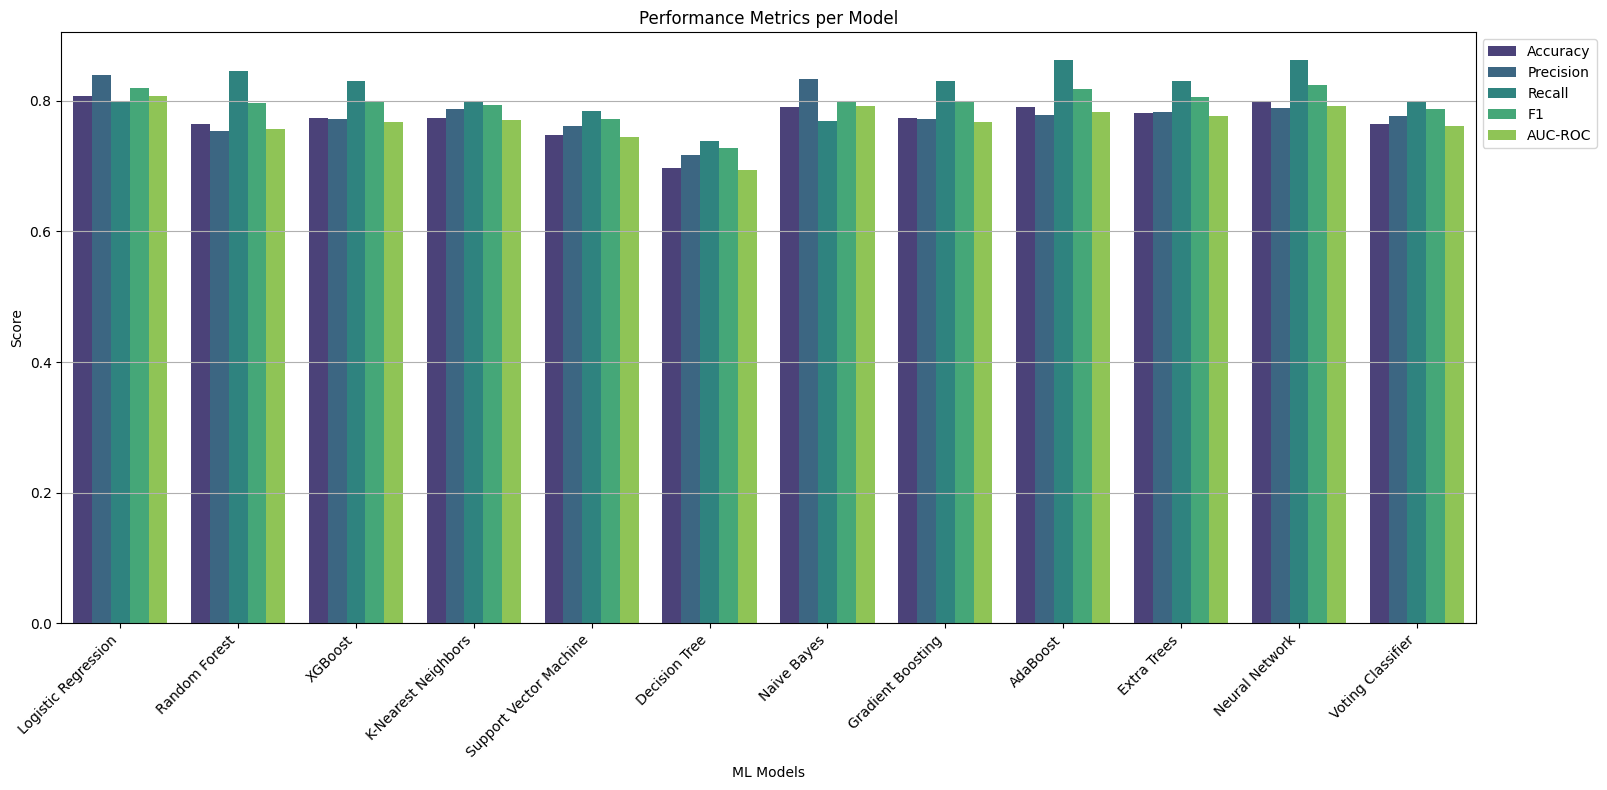

Performance Metrics per Model:
                     Model  Accuracy  Precision    Recall        F1   AUC-ROC
0      Logistic Regression  0.806723   0.838710  0.800000  0.818898  0.807407
1            Random Forest  0.764706   0.753425  0.846154  0.797101  0.756410
2                  XGBoost  0.773109   0.771429  0.830769  0.800000  0.767236
3      K-Nearest Neighbors  0.773109   0.787879  0.800000  0.793893  0.770370
4   Support Vector Machine  0.747899   0.761194  0.784615  0.772727  0.744160
5            Decision Tree  0.697479   0.716418  0.738462  0.727273  0.693305
6              Naive Bayes  0.789916   0.833333  0.769231  0.800000  0.792023
7        Gradient Boosting  0.773109   0.771429  0.830769  0.800000  0.767236
8                 AdaBoost  0.789916   0.777778  0.861538  0.817518  0.782621
9              Extra Trees  0.781513   0.782609  0.830769  0.805970  0.776496
10          Neural Network  0.798319   0.788732  0.861538  0.823529  0.791880
11       Voting Classifier  0.764

In [15]:
# Function to calculate performance metrics
def calculate_performance(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc

# Initialize lists to store performance data
model_names = []
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

# Calculate and store performance metrics for each model
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1, auc = calculate_performance(model_name, y_test, y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)

# Create DataFrame from performance data
df_performance = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'AUC-ROC': aucs,

})

# Melt the DataFrame to long format for plotting
df_melt = pd.melt(df_performance, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot all performance metrics using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='viridis')
plt.title("Performance Metrics per Model")
plt.xlabel("ML Models")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(axis="y")
plt.show()

print("Performance Metrics per Model:")
print(df_performance)


**Recall** is the most important metric in this context, as it ensures that nearly all high-risk patients are identified, minimizing false negatives. The best three models by **Recall** are:

1. **Neural Network (Recall: 0.8615)**
2. **AdaBoost (Recall: 0.8615)**
3. **Random Forest (Recall: 0.8462)**

However, **AUC-ROC** is also critical to ensure that the model effectively distinguishes between true positives and false positives. The top three models by **AUC-ROC** are:

1. **Logistic Regression (AUC-ROC: 0.8074)**
2. **Naive Bayes (AUC-ROC: 0.7920)**
3. **Neural Network (AUC-ROC: 0.7919)**

The **Neural Network** not only ranks among the top models in **Recall**, but also shows competitive results in **AUC-ROC**, making it a more balanced choice for this task. Moreover, its ability to provide detailed explanations through **SHAP** adds a significant advantage in a clinical setting.

### Why not AdaBoost?
Although **AdaBoost** ties with the **Neural Network** in terms of **Recall**, its **AUC-ROC** (0.7826) is lower, which suggests it may struggle more to distinguish between true positives and false positives compared to the **Neural Network**. Additionally, AdaBoost lacks support for **SHAP explainability**, making it less transparent when interpreting feature importance—an essential requirement in clinical decision-making.

### Why not Logistic Regression?
**Logistic Regression** performs best in terms of **AUC-ROC** (0.8074), meaning it can better distinguish between high-risk and low-risk patients. However, its **Recall** (0.8000) is lower than that of the **Neural Network** and **AdaBoost**, making it less suitable for identifying all high-risk patients, which is our priority. Additionally, while Logistic Regression may be less prone to overfitting due to its simplicity, this is outweighed by its lower recall in this context.

### Neural Network as the Final Choice:
The **Neural Network** strikes the best balance between **Recall** (0.8615) and **AUC-ROC** (0.7919), offering high recall while maintaining a competitive AUC. Importantly, its support for **SHAP explainability** allows clinicians to understand and trust the predictions, making it the ideal choice for this application.

### Neural Network Performance:
- **Accuracy**: 0.7983
- **Precision**: 0.7887
- **Recall**: 0.8615
- **F1-Score**: 0.8235
- **AUC-ROC**: 0.7919

- **Training Time**: 56.98 seconds
- **Prediction Time**: 0.18 seconds

Therefore, the **Neural Network** has been chosen for implementation due to its balanced performance in both **Recall** and **AUC-ROC**, while offering the added benefit of interpretability through SHAP analysis. Despite the longest **Traning Time** of 57 seconds, it still has a **Prediction Time** of just 0.18 seconds, which is suitable for the application.

## 4. Export best ML model with `pickle` or keras



In [16]:
best_model_name = 'Neural Network'
best_model = best_estimators[best_model_name]

# Define the save path
save_path = "../visualization/models/"

# Create directories if they don't exist
os.makedirs(save_path, exist_ok=True)

# Check if the model is a Neural Network (Keras model)
if best_model_name == 'Neural Network':
    # Extract the underlying Keras model from KerasClassifier if it's wrapped
    keras_model = best_model.model_ if hasattr(best_model, 'model_') else best_model

    # Define the full save path for the Keras model
    model_save_path = os.path.join(save_path, "risk_prediction_model.h5")

    # Save the Keras model using the Keras save method
    keras_model.save(model_save_path)
    print(f"Neural Network model saved to {model_save_path}")

else:
    # Define the full save path for non-Keras models
    model_save_path = os.path.join(save_path, "risk_prediction_model_model.pkl")

    # Save the model using pickle
    with open(model_save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"{best_model_name} model saved to {model_save_path}")

Neural Network model saved to ../visualization/models/risk_prediction_model.h5


## 5. Explanability of the model's predictions using SHAP

In [17]:
feature_names = df.columns.drop('Has_heart_disease')
print(f"Feature names: {feature_names}")

Feature names: Index(['age', 'serum_cholesterol', 'max_heart_rate', 'st_depression',
       'has_hypertension', 'cigarettes_per_day', 'years_smoking',
       'resting_heart_rate', 'high_fasting_blood_sugar',
       'exercise_induced_angina', 'family_history_cad', 'gender_F', 'gender_M',
       'cp_Asymptomatic', 'cp_Atypical_Angina', 'cp_Non_Anginal_Pain',
       'cp_Typical_Angina', 'ecg_LVH', 'ecg_Normal', 'ecg_ST_Abnormality'],
      dtype='object')


c:\Users\kentf\cardiovision\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\kentf\cardiovision\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']
  warnings.warn(


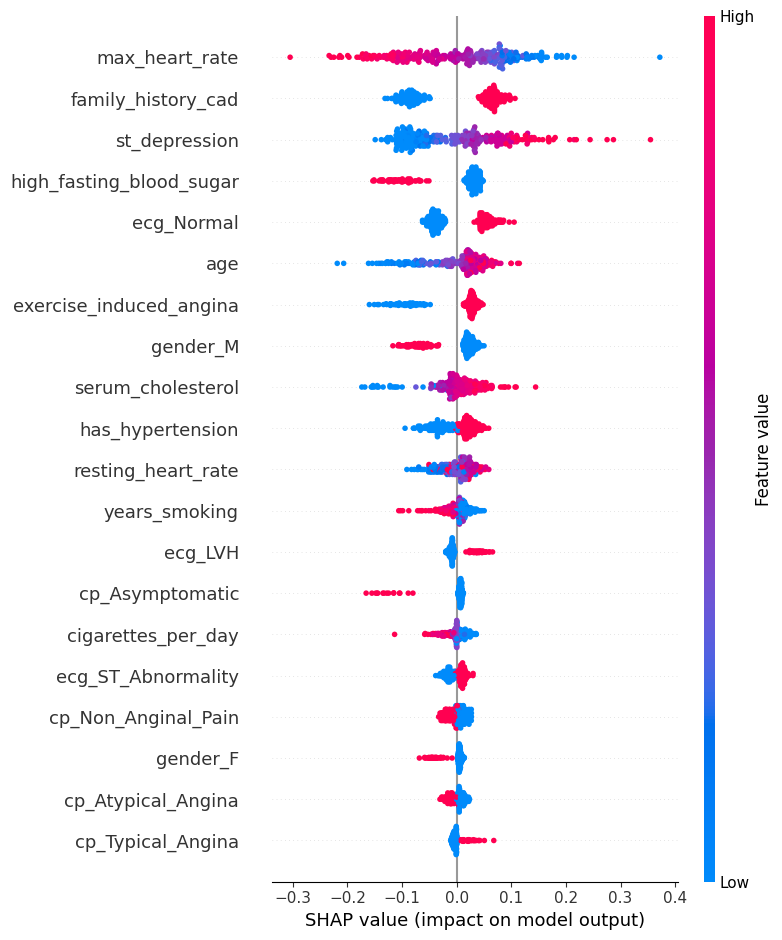

In [26]:
# Extract feature names, excluding the 'Has_heart_disease' column
feature_names = df.columns.drop('Has_heart_disease')

# Access the best model
best_model = best_estimators[best_model_name]

# Use a subset of X_train for SHAP calculation / taken out the number again, as it worked with the full data
X_train_subset = X_train[:]

# If the model is a KerasClassifier, extract the underlying Keras model
if isinstance(best_model, KerasClassifier):
    # Extract the Keras model from the SciKeras wrapper
    keras_model = best_model.model_
else:
    keras_model = best_model

# Initialize SHAP explainer
if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting', 'Extra Trees']:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)
elif best_model_name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'AdaBoost']:
    explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
    shap_values = explainer.shap_values(X_train, nsamples=277)
elif best_model_name == 'Neural Network':
    # Use the extracted Keras model for SHAP
    explainer = shap.DeepExplainer(keras_model, X_train_subset)
    shap_values = explainer.shap_values(X_train_subset)
    shap_values = np.squeeze(shap_values)
else:
    print(f"SHAP analysis not supported for {best_model_name}.")
    shap_values = None

# Plot the SHAP summary plot
if shap_values is not None:
    
    shap.summary_plot(shap_values, features=X_train_subset, feature_names=feature_names)
else:
    print(f"SHAP analysis not supported for {best_model_name}.")


*Checking out what we can find out about each patient*

In [19]:
# Use `predict_proba` to get the predicted probabilities for each sample
predicted_probabilities = best_model.predict_proba(X_test)

# Print the probability for the first patient (first observation in X_test)
# predicted_probabilities[0][1] represents the probability of class 1 (e.g., heart disease)
print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predicted_probabilities[0][1])
)

This particular patient had a 92.2 percent probability of having a heart disease, as evaluated by our model.


In [20]:
# Change the dimensions of the shap_values / Just take the positive predicition part
shap_values_patient = explainer.shap_values(X_test[0].reshape(1, -1))
shap_values_patient = np.squeeze(shap_values_patient)

shap_values_patient

c:\Users\kentf\cardiovision\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']
  warnings.warn(


array([ 0.01649123,  0.02478482,  0.14830202,  0.01946473,  0.02827146,
       -0.02868146,  0.00230993, -0.06881277,  0.02751049,  0.02963571,
        0.05847354,  0.00330491,  0.01915672,  0.00664618,  0.00447321,
       -0.00455641, -0.00077286, -0.00710978,  0.05471823,  0.00706165])

In [21]:
# Select patient
patient_number = 4

In [22]:
# Ensure X_test[0] is a NumPy array (not an EagerTensor)
x_test_patient = X_test[patient_number].numpy() if isinstance(X_test[patient_number], tf.Tensor) else X_test[patient_number]

# Compute SHAP values for the first patient (convert to NumPy if needed)
shap_values_patient = explainer.shap_values(x_test_patient.reshape(1, -1))
shap_values_patient = np.squeeze(shap_values_patient)  # Remove unnecessary dimensions

# Check if expected_value is an EagerTensor, convert to NumPy if needed
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
if isinstance(expected_value, tf.Tensor):
    expected_value = expected_value.numpy()

# Initialize JavaScript visualization for SHAP
shap.initjs()

# Force plot for patient 0
shap.force_plot(expected_value, shap_values_patient, x_test_patient, feature_names=feature_names)

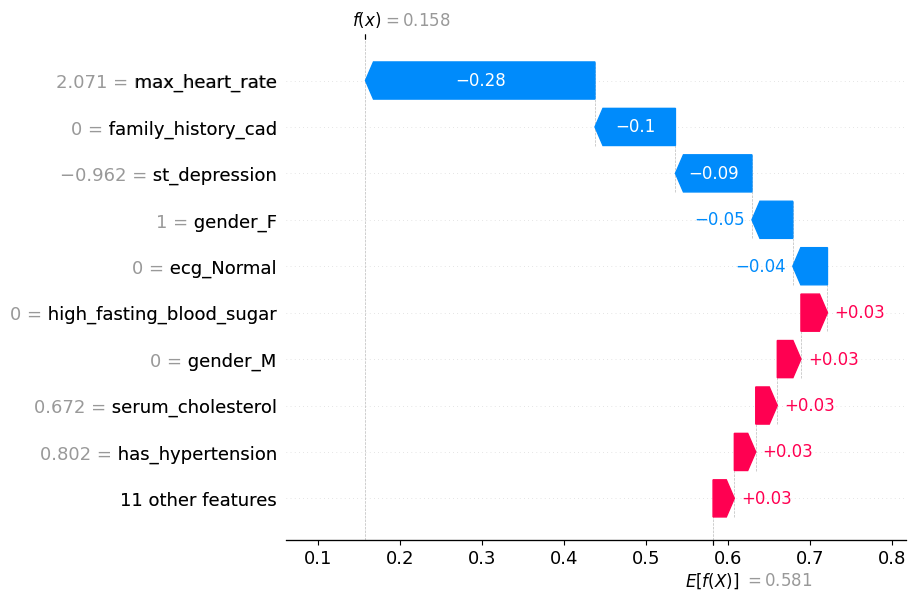

In [23]:
# Ensure X_test[i] is a NumPy array (not an EagerTensor)
x_test_patient = X_test[patient_number].numpy() if isinstance(X_test[patient_number], tf.Tensor) else X_test[patient_number]

# Compute SHAP values for the selected patient (convert to NumPy if needed)
shap_values_patient = explainer.shap_values(x_test_patient.reshape(1, -1))
shap_values_patient = np.squeeze(shap_values_patient)  # Remove unnecessary dimensions

# Check if expected_value is an EagerTensor, convert to NumPy if needed
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
if isinstance(expected_value, tf.Tensor):
    expected_value = expected_value.numpy()

# Use the waterfall plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values_patient,
    base_values=expected_value, 
    data=x_test_patient,
    feature_names=feature_names
))
